In [1]:
import logging
rl = logging.getLogger()
rl.setLevel(logging.INFO)

In [2]:
import radial
import angular
import nearby_root_finder

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)

# Exploring values of inversion error function

In [3]:
radial.Leaver_Cf_trunc_inversion(0.4-0.2j, 0., -2, 2, 4.+0.j, 0, 300, 1.+0.j)

(-3.7832264403820357-1.8368923380529323j)

In [4]:
Npts=100
omegar=np.arange(0.2, .5, .3/Npts)
omegai=np.arange(-0.2, -0., .2/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [5]:
leav1 = lambda omega: radial.Leaver_Cf_trunc_inversion(omega, 0., -2, 2, 4.+0.j, 0, 300, 0.j)
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

In [16]:
def leav1(omega): 
    inv_err, cf_err, its = radial.Leaver_Cf_inv_Lentz(omega, 0., -2, 2, 4.+0.j, 0)
    # logging.info("Lentz terminated with cf_err={}, its={}".format(cf_err, its))
    return inv_err
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

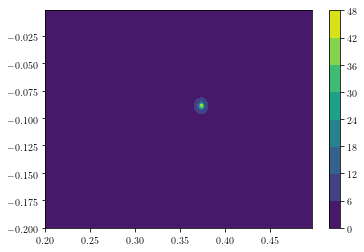

In [8]:
CS = plt.contourf(Or, Oi, 1/np.abs(Leavers))
plt.colorbar(CS)
plt.show()

In [9]:
angular.sep_const_closest(4., -2, 0.1, 2, 20)

(3.7259203780062347+0j)

In [8]:
Npts=120
orrange=[0., .4]
oirange=[-2.3,-0.75]
omegar=np.arange(orrange[0], orrange[1], (orrange[1]-orrange[0])/Npts)
omegai=np.arange(oirange[0], oirange[1], (oirange[1]-oirange[0])/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [9]:
a = 0.0
s = -2
m = 2
l = 2

n_inv = 6
Nr = 300
r_N = 0.
l_max = 20

leav1 = lambda omega: radial.Leaver_Cf_trunc_inversion(omega, a, s, m, 
                                                       angular.sep_const_closest(angular.SWSphericalH_A(s,l,m),
                                                                                 s, a*omega, m, l_max),
                                                       n_inv, Nr, r_N)

leavf = np.vectorize(leav1)
Leavers = leavf(Os)

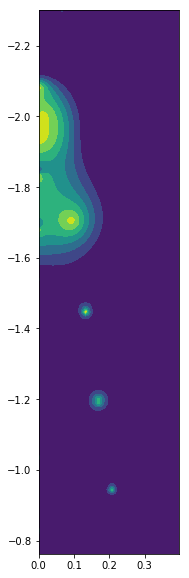

In [10]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.exp(-np.abs(Leavers)))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
#plt.colorbar(CS)
plt.savefig("test.png", bbox_inches="tight", dpi=300)
plt.show()

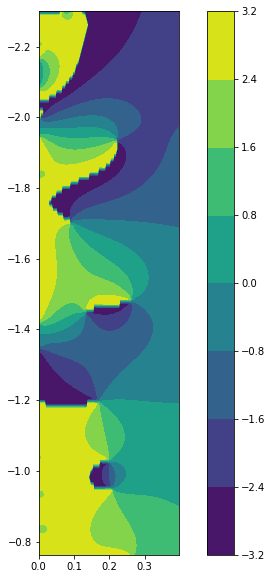

In [11]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.angle(Leavers))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.colorbar(CS)
plt.show()

In [12]:
from scipy import optimize

In [13]:
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

def leavA(x):
    omega = x[0] + 1.j*x[1]
    A = angular.sep_const_closest(A0, s, a*omega, m, l_max)
    Leav_err = radial.Leaver_Cf_trunc_inversion(omega, a, s, m, A, n_inv, Nr, r_N)
    return [np.real(Leav_err), np.imag(Leav_err)]

sol = optimize.root(leavA, [np.real(omega_guess), np.imag(omega_guess)], tol=1e-10)
print(sol)
omega_sol = sol.x[0] + 1.j*sol.x[1]
print(omega_sol)

    fjac: array([[-0.57359808, -0.81913689],
       [ 0.81913689, -0.57359808]])
     fun: array([-1.33226763e-14, -2.08721929e-14])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.81513595e-12, -8.49256196e-13])
       r: array([-37.83289639, -11.46901807,  -6.65014296])
  status: 1
 success: True
       x: array([ 0.34774125, -0.83259476])
(0.3477412539359394-0.8325947550362678j)


In [14]:
angular.sep_consts(s, a*omega_sol, m, l_max)

array([  3.64660074+1.21471602j,   9.82630392+0.6137243j ,
        17.91099677+0.38582177j,  27.95981518+0.27679539j,
        39.98983299+0.21636142j,  54.00938032+0.17936711j,
        70.0227435 +0.15505889j,  88.0322533 +0.13821883j,
       108.03924895+0.12606481j, 130.04453913+0.11700177j,
       154.04863361+0.11006122j, 180.05186591+0.10462704j,
       208.05446134+0.10029188j, 238.05657636+0.09677759j,
       270.05832233+0.0938889j , 304.05978018+0.09148542j,
       340.06100989+0.08946407j, 418.04949541+0.07276048j,
       378.06205594+0.08780761j])

In [15]:
angular.sep_consts(s, 0., 2, 20)

array([  4.+0.j,  10.+0.j,  18.+0.j,  28.+0.j,  40.+0.j,  54.+0.j,
        70.+0.j,  88.+0.j, 108.+0.j, 130.+0.j, 154.+0.j, 180.+0.j,
       208.+0.j, 238.+0.j, 270.+0.j, 304.+0.j, 340.+0.j, 378.+0.j,
       418.+0.j])

# Testing the nearby_root_finder class

In [4]:
from nearby_root_finder import nearby_root_finder

In [5]:
tol = 1e-10
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

In [6]:
finder = nearby_root_finder(a=a, s=s, m=m, A_closest_to=A0,
                            l_max=l_max, omega_guess=omega_guess,
                            tol=tol, n_inv=n_inv, Nr=Nr, r_N=r_N)

In [7]:
finder.do_solve()

(0.34774125399689443-0.8325947549910427j)

In [8]:
finder.set_params(a=0.1)
finder.set_params(Nr=300)
o1 = finder.do_solve()
finder.set_params(Nr=301)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(-0.18951803565249747-0.9634120162791221j)
0j
0.0


In [9]:
finder.set_params(a=0.3)
finder.set_params(l_max=20)
o1 = finder.do_solve()
finder.set_params(l_max=21)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(0.2464572165794458-1.1069149779629603j)
(1.970645868709653e-15+4.440892098500626e-15j)
4.858494393367941e-15


# Testing the Kerr_a_seq_finder class

In [10]:
from Kerr_a_seq_finder import Kerr_a_seq_finder

In [11]:
a_max = .995
tol=1e-10

n=0
s=-2
l=5
ms=np.arange(-l,l+1)
seqs = [None] * len(ms)
for i,m in enumerate(ms):
    seqs[i] = Kerr_a_seq_finder(n=n, a_max=a_max, delta_a=5e-3, s=s, l=l, m=m)
    seqs[i].do_find_sequence()

INFO:root:Loading Schw QNM dict from file ./data/Schw_table.pickle
INFO:root:n=0, l=5, started from guess omega=(1.01229531214-0.0948705160816j), found omega=(1.01229531214-0.0948705160816j)
INFO:root:n=0, l=5, started from guess omega=(1.01229531214-0.0948705160816j), found omega=(1.01229531214-0.0948705160816j)
INFO:root:n=0, l=5, started from guess omega=(1.01229531214-0.0948705160816j), found omega=(1.01229531214-0.0948705160816j)
INFO:root:n=0, l=5, started from guess omega=(1.01229531214-0.0948705160816j), found omega=(1.01229531214-0.0948705160816j)
INFO:root:n=0, l=5, started from guess omega=(1.01229531214-0.0948705160816j), found omega=(1.01229531214-0.0948705160816j)
INFO:root:n=0, l=5, started from guess omega=(1.01229531214-0.0948705160816j), found omega=(1.01229531214-0.0948705160816j)
INFO:root:n=0, l=5, started from guess omega=(1.01229531214-0.0948705160816j), found omega=(1.01229531214-0.0948705160816j)
INFO:root:n=0, l=5, started from guess omega=(1.01229531214-0.094

In [15]:
a_max = .998
tol=1e-10

ns=np.arange(0,8)
s=-2
ls=np.arange(2,8)
m=2
seqs = {}
for n in ns:
    for l in ls:
        seqs[(l,n)] = Kerr_a_seq_finder(n=n, a_max=a_max, delta_a=3e-3, s=s, l=l, m=m)
        seqs[(l,n)].do_find_sequence()

INFO:root:n=0, l=2, started from guess omega=(0.373671684418-0.0889623156889j), found omega=(0.373671684418-0.0889623156889j)
INFO:root:n=0, l=3, started from guess omega=(0.599443288437-0.0927030479449j), found omega=(0.599443288437-0.0927030479449j)
INFO:root:n=0, l=4, started from guess omega=(0.809178377532-0.0941639609889j), found omega=(0.809178377532-0.0941639609889j)
INFO:root:n=0, l=5, started from guess omega=(1.01229531214-0.0948705160816j), found omega=(1.01229531214-0.0948705160816j)
INFO:root:n=0, l=6, started from guess omega=(1.21200982065-0.0952658458421j), found omega=(1.21200982065-0.0952658458421j)
INFO:root:n=0, l=7, started from guess omega=(1.40973512061-0.0955096292751j), found omega=(1.40973512061-0.095509629276j)
INFO:root:n=1, l=2, started from guess omega=(0.346710996879-0.273914875291j), found omega=(0.346710996879-0.273914875291j)
INFO:root:n=1, l=3, started from guess omega=(0.582643803034-0.281298113429j), found omega=(0.582643803033-0.281298113435j)
INF

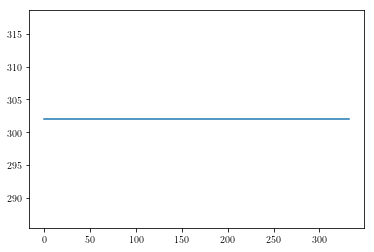

In [40]:
plt.plot(1.e-17+np.array(seqs[(6,7)].iters))
plt.show()

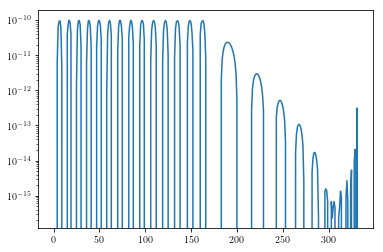

In [45]:
plt.plot(1.e-17+np.array(seqs[(2,4)].cf_err))
plt.gca().set_yscale('log')
plt.show()

/usr/local/lib/python2.7/site-packages/numpy/lib/histograms.py:761: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python2.7/site-packages/matplotlib/transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python2.7/site-packages/matplotlib/transforms.py:2052: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


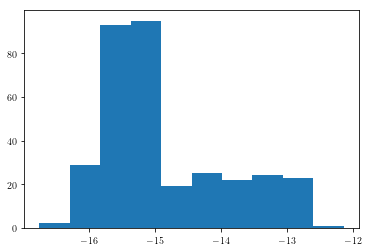

In [46]:
plt.hist(np.log10(1.e-16 + np.array(seqs[(2,2)].cf_err)))
plt.show()

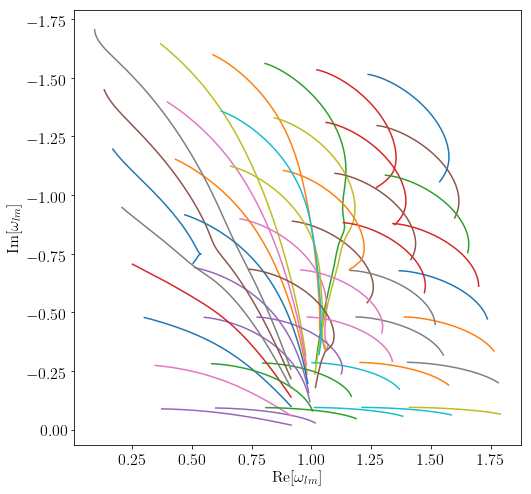

In [47]:
plt.figure(figsize=(8,8))

for (l,n), seq in seqs.iteritems():
    plt.plot(np.real(seq.omega), np.imag(seq.omega))
#plt.xlim(-1.5, 1.5)
#plt.ylim(-1.7,0.)

plt.gca().invert_yaxis()
plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[\omega_{lm}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[\omega_{lm}]$', fontsize=16)
plt.savefig("test.png", bbox_inches="tight", dpi=300)
plt.show()

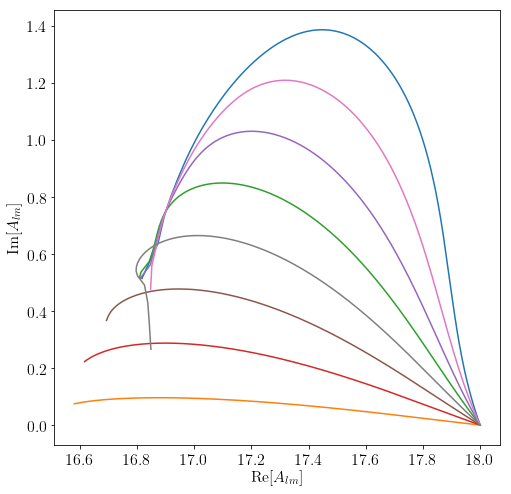

In [48]:
plt.figure(figsize=(8,8))

for (l,n), seq in seqs.iteritems():
    if (l==4):
        plt.plot(np.real(seq.A), np.imag(seq.A))

plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[A_{lm}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[A_{lm}]$', fontsize=16)
# plt.savefig("test.png", bbox_inches="tight", dpi=300)

plt.show()

# Testing the build_Schw_dict function and auto-generating dict in module

In [9]:
import Schw_table

In [17]:
reload(Schw_table)

<module 'Schw_table' from 'Schw_table.pyc'>

In [96]:
n_max = 20
l_max = 20
s_arr = [-2, -1, 0]

tol = 1e-10

Schw_dict, Schw_err_dict = Schw_table.build_Schw_dict(s_arr=s_arr, n_max=n_max, l_max=l_max, tol=tol)


In [18]:
from Schw_table import Schw_QNM_dict

In [21]:
my_dict = Schw_QNM_dict().load_dict()

In [22]:
len(my_dict.keys())

1880

In [103]:
import sys
sys.getsizeof(my_dict)

196888

In [104]:
sorted([ (s,l,n) for (s,l,n) in my_dict.keys() if (s==-2) and (l==2) ])

[(-2, 2, 0),
 (-2, 2, 1),
 (-2, 2, 2),
 (-2, 2, 3),
 (-2, 2, 4),
 (-2, 2, 5),
 (-2, 2, 6),
 (-2, 2, 7),
 (-2, 2, 8),
 (-2, 2, 9),
 (-2, 2, 10),
 (-2, 2, 11),
 (-2, 2, 12),
 (-2, 2, 13),
 (-2, 2, 14),
 (-2, 2, 15),
 (-2, 2, 16),
 (-2, 2, 17),
 (-2, 2, 18),
 (-2, 2, 19)]

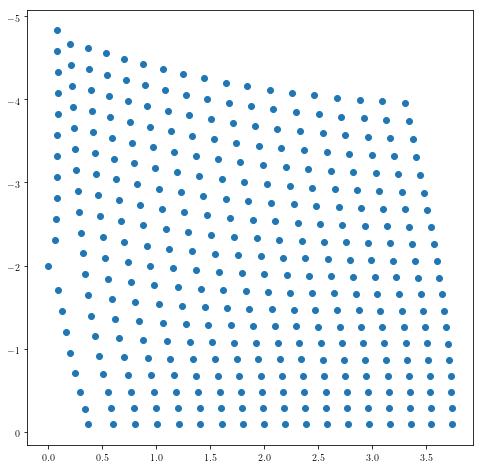

In [105]:
oms = [ my_dict[(s,l,n)] for (s,l,n) in my_dict.keys() if (s==-2)  ]
plt.figure(figsize=(8,8))
plt.scatter(np.real(oms),np.imag(oms))
plt.gca().invert_yaxis()
plt.show()

In [106]:
print(my_dict[(-2,2,8)])
print(Schw_err_dict[(-2,2,8)])

(6.56774356697e-12-1.99870696783j)
0.0365153858812


In [107]:
[Schw_err_dict[(-2,2,n)] for n in np.arange(0,20)]

[0.0,
 0.0,
 1.3011113783003615e-12,
 1.9459420627738004e-11,
 4.206583930940295e-11,
 5.6337293500669584e-11,
 6.898557092026287e-11,
 1.0658354394238487e-09,
 0.03651538588116355,
 2.530524664232532e-06,
 8.320762142804283e-07,
 2.626284970481437e-07,
 1.1787351903552884e-06,
 1.922382488806336e-06,
 3.2666440914702673e-06,
 5.555972633858193e-06,
 9.288545118888024e-06,
 1.5146330180828229e-05,
 2.4023719126501803e-05,
 3.705820739556879e-05]

In [23]:
blurg = {}

In [41]:
import cont_frac

In [68]:
reload(cont_frac)

<module 'cont_frac' from 'cont_frac.py'>

In [83]:
def rt2b(n):
    if (n==0):
        return 1
    return 2

def rt2a(n): return 1

cont_frac.Lentz(rt2a, rt2b)

(1.4142135623638004, -4.488287519421874e-11, 15)

In [84]:
phia = rt2a
phib = rt2a

cont_frac.Lentz(phia, phib)

(1.6180339887802424, 6.785971784495359e-11, 26)

In [92]:
def pia(n):
    if (n==1):
        return 4.
    return (n-1.)*(n-1.)
    
def pib(n):
    if (n==0):
        return 0.
    return 2*n-1.

cont_frac.Lentz(pia, pib, tol=1.e-15)

(3.1415926535897922, 8.881784197001252e-16, 22)

In [91]:
def pia(n):
    if (n==1):
        return 4.
    return (n-1.)*(n-1.)
    
def pib(n):
    if (n==0):
        return 0.
    return 2*n-1.

cont_frac.Lentz(pia, pib, tol=1.e-15)

(3.1415926535897922, 8.881784197001252e-16, 22)

In [94]:
def e_a(n):
    if (n==1):
        return 1.
    return (n-1.)
    
def e_b(n):
    if (n==0):
        return 2.
    return n

cont_frac.Lentz(e_a, e_b, tol=1.e-15)

(2.7182818284590464, -3.3306690738754696e-16, 17)

In [96]:
def cot1_a(n):
    return -1.
    
def cot1_b(n):
    return 2.*n+1.

print(1./np.tan(1.))
cont_frac.Lentz(cot1_a, cot1_b, tol=1.e-15)

0.6420926159343308


(0.6420926159343306, -1.1102230246251565e-16, 10)